In [ ]:
# !pip install nilearn

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
# from nilearn import datasets
from nilearn import plotting
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [8]:
import os
# Root directory where your "images" folder is located
root_directory = '/Users/siddharthdeo/Downloads/Segmented images'

In [9]:
def load_all_defaced_MPRAGE_files_in_order(directory):
    loaded_images = []

    # Get a sorted list of directories
    sorted_dirs = sorted(next(os.walk(directory))[1])

    for dir_name in sorted_dirs:
        dir_path = os.path.join(directory, dir_name)
        for root, _, files in os.walk(dir_path):
            if 'defaced_MPRAGE.nii.gz' in files:
                file_path = os.path.join(root, 'defaced_MPRAGE.nii.gz')
                try:
                    image = nib.load(file_path)
                    loaded_images.append(image)
                    print(f"Loaded: {file_path}")
                except Exception as e:
                    print(f"Error loading {file_path}: {str(e)}")

    return loaded_images

# Call the function with your root directory
loaded_images = load_all_defaced_MPRAGE_files_in_order(root_directory)



Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1013090_500c/11/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1097782_3f0c/11/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1143655_1a05/9/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1150497_75ee/11/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1216620_3cfc/11/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1264721_41eb/11/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1285465_4097/11/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1288657_3170/11/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1292527_195c/11/DEFACED_NIFTI/defaced_MPRAGE.nii.gz
Loaded: /Us

In [35]:
len(loaded_images)

165

: 

Visualize Image

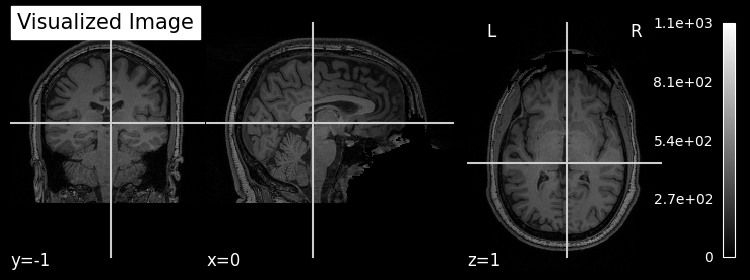

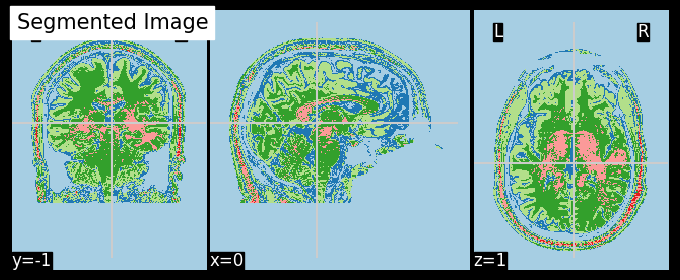

In [11]:
from nilearn import plotting

# Select an image from the list (e.g., the first image)
selected_image = loaded_images[0]

# Plot the image using Nilearn's plotting function
plotting.plot_anat(selected_image, cmap='gray', title='Visualized Image', colorbar=True)
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='ortho', cut_coords=None, cmap='Paired')


# Display the plot
plotting.show()


In [12]:

# Read TIV values from the "tiv.txt" file
tiv_filename = '/Users/siddharthdeo/Downloads/Segmented images/TIVfinal.txt'

# Initialize an empty list to store TIV values
tiv_values = []

with open(tiv_filename, 'r') as file:
    for line in file:
        tiv = float(line.strip())
        tiv_values.append(tiv)


In [13]:
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom

# Load the TIV values from the "tiv.txt" file
tiv_filename = '/Users/siddharthdeo/Downloads/Segmented images/TIVfinal.txt'

# Initialize an empty list to store TIV values
tiv_values = []

with open(tiv_filename, 'r') as file:
    for line in file:
        tiv = float(line.strip())
        tiv_values.append(tiv)

# Function to perform TIV rescaling and image resizing on a single image
def rescale_and_resize_image(image, tiv_value, target_shape=(192, 256, 256)):
    try:
        image_data = image.get_fdata()
        
        # Calculate scaling factors for each dimension
        scaling_factors = [tiv_value ** (1/3) / current_dim for current_dim in image_data.shape]
        
        # Resize the image to the target shape using cubic interpolation
        resized_data = zoom(image_data, scaling_factors, order=3)
        
        # Create a new Nifti image with the resized data
        resized_image = nib.Nifti1Image(resized_data, affine=image.affine)
        
        return resized_image
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        return None

# Perform TIV rescaling and resizing on all loaded images
rescaled_and_resized_images = []

for i, image in enumerate(loaded_images):
    if i < len(tiv_values):
        try:
            tiv_value = tiv_values[i]
            rescaled_and_resized_image = rescale_and_resize_image(image, tiv_value)
            if rescaled_and_resized_image is not None:
                rescaled_and_resized_images.append(rescaled_and_resized_image)
                print(f"Processed image {i + 1}/{len(loaded_images)}")
            else:
                print(f"Skipping image {i + 1} due to processing error")
        except Exception as e:
            print(f"Error processing image {i + 1}: {str(e)}")
            print(f"Skipping image {i + 1} and its corresponding TIV value")
    else:
        print(f"No TIV value found for image {i + 1}")

# Now, rescaled_and_resized_images contains the images after TIV rescaling and resizing


Processed image 1/165
Processed image 2/165
Processed image 3/165
Processed image 4/165


KeyboardInterrupt: 

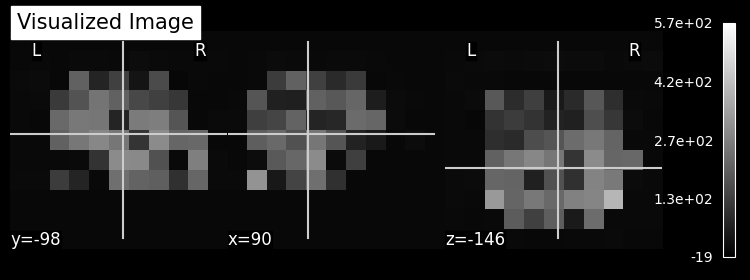

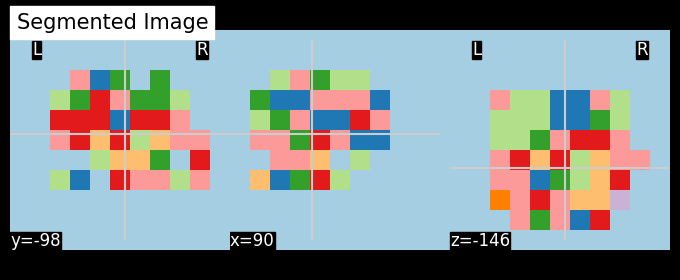

In [10]:
from nilearn import plotting

# Select an image from the list (e.g., the first image)
selected_image = rescaled_and_resized_images[10]

# Plot the image using Nilearn's plotting function
plotting.plot_anat(selected_image, cmap='gray', title='Visualized Image', colorbar=True)
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='ortho', cut_coords=None, cmap='Paired')


# Display the plot
plotting.show()


In [14]:
import numpy as np

# Load the TIV values from the "tiv.txt" file
tiv_filename = '/Users/siddharthdeo/Downloads/Segmented images/TIVfinal.txt'

# Initialize an empty list to store TIV values
tiv_values = []

with open(tiv_filename, 'r') as file:
    for line in file:
        tiv = float(line.strip())
        tiv_values.append(tiv)

# Function to perform TIV rescaling on a single image
def rescale_image(image, tiv_value):
    try:
        image_data = image.get_fdata()
        rescaled_data = image_data / tiv_value
        return nib.Nifti1Image(rescaled_data, affine=image.affine)
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        return None

# Perform TIV rescaling on all loaded images
rescaled_images = []

for i, image in enumerate(loaded_images):
    if i < len(tiv_values):
        try:
            tiv_value = tiv_values[i]
            rescaled_image = rescale_image(image, tiv_value)
            if rescaled_image is not None:
                rescaled_images.append(rescaled_image)
                print(f"Rescaled image {i + 1}/{len(loaded_images)}")
            else:
                print(f"Skipping image {i + 1} due to processing error")
        except Exception as e:
            print(f"Error processing image {i + 1}: {str(e)}")
            print(f"Skipping image {i + 1} and its corresponding TIV value")
    else:
        print(f"No TIV value found for image {i + 1}")

# Now, rescaled_images contains the images after TIV rescaling


Rescaled image 1/165
Rescaled image 2/165
Rescaled image 3/165
Rescaled image 4/165
Rescaled image 5/165
Rescaled image 6/165
Rescaled image 7/165
Rescaled image 8/165
Rescaled image 9/165
Rescaled image 10/165
Rescaled image 11/165
Rescaled image 12/165
Rescaled image 13/165
Rescaled image 14/165
Rescaled image 15/165
Rescaled image 16/165
Rescaled image 17/165
Rescaled image 18/165
Rescaled image 19/165
Rescaled image 20/165
Rescaled image 21/165
Rescaled image 22/165
Rescaled image 23/165
Rescaled image 24/165
Rescaled image 25/165
Rescaled image 26/165
Rescaled image 27/165
Rescaled image 28/165
Rescaled image 29/165
Rescaled image 30/165
Rescaled image 31/165
Rescaled image 32/165
Rescaled image 33/165
Rescaled image 34/165
Rescaled image 35/165
Rescaled image 36/165
Rescaled image 37/165
Rescaled image 38/165
Rescaled image 39/165
Rescaled image 40/165
Rescaled image 41/165
Rescaled image 42/165
Rescaled image 43/165
Rescaled image 44/165
Rescaled image 45/165
Rescaled image 46/1

In [15]:
for img in rescaled_images:
    # Get the shape (dimensions) of each image
    shape = img.shape
    print(f"Image Dimensions: {shape}")


Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (191, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensio

In [11]:
loaded_images

[]

In [9]:
import numpy as np

# Find the dimensions of the largest image
max_height = max(img.shape[0] for img in rescaled_images)
max_width = max(img.shape[1] for img in rescaled_images)

# Initialize a list to store the padded images
padded_images = []

# Pad images to match the dimensions of the largest image
for img in rescaled_images:
    height_diff = max_height - img.shape[0]
    width_diff = max_width - img.shape[1]
    
    if height_diff > 0 or width_diff > 0:
        # Padding is necessary
        padded_img = np.pad(img, ((0, height_diff), (0, width_diff)), mode='constant')
        padded_images.append(padded_img)
    else:
        # No padding needed
        padded_images.append(img)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (0,2)

In [ ]:
# import numpy as np


# tiv_filename = '/Users/siddharthdeo/Downloads/Segmented images/TIV.txt'
# # Initialize an empty list to store TIV values
# tiv_values = []

# with open(tiv_filename, 'r') as file:
#     for line in file:
#         tiv = float(line.strip())
#         tiv_values.append(tiv)

# # Function to perform TIV rescaling on a single image
# def rescale_image(image, tiv_value):
#     try:
#         image_data = image.get_fdata()
#         rescaled_data = image_data / tiv_value
#         return nib.Nifti1Image(rescaled_data, affine=image.affine)
#     except Exception as e:
#         print(f"Error processing image: {str(e)}")
#         return None

# # Perform TIV rescaling for the first 160 images only
# rescaled_images = []

# num_images_to_process = min(150, len(loaded_images))  # Process up to 160 images or fewer if there are fewer loaded images

# for i in range(num_images_to_process):
#     try:
#         image = loaded_images[i]
#         tiv_value = tiv_values[i]
#         rescaled_image = rescale_image(image, tiv_value)
#         if rescaled_image is not None:
#             rescaled_images.append(rescaled_image)
#             print(f"Rescaled image {i + 1}/{num_images_to_process}")
#         else:
#             print(f"Skipping image {i + 1} due to processing error")
#     except Exception as e:
#         print(f"Error processing image {i + 1}: {str(e)}")

# # Now, rescaled_images contains the rescaled images for the first 160 images


In [14]:
rescaled_images

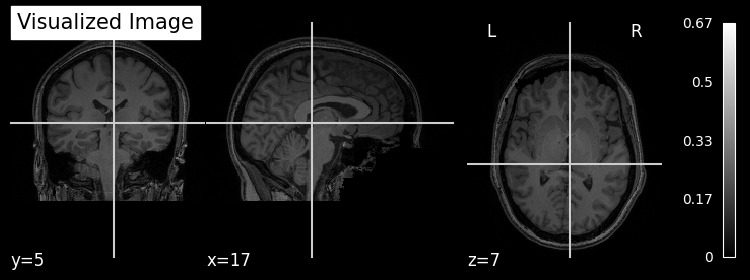

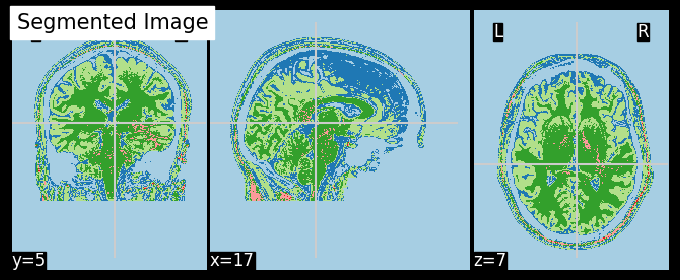

In [10]:
from nilearn import plotting

# Select an image from the list (e.g., the first image)
selected_image = rescaled_images[100]

# Plot the image using Nilearn's plotting function
plotting.plot_anat(selected_image, cmap='gray', title='Visualized Image', colorbar=True)
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='ortho', cut_coords=None, cmap='Paired')


# Display the plot
plotting.show()


In [7]:
rescaled_images

Flatening

In [ ]:
flattened_images1 = []
flattened_images2 = []

In [16]:
rescaled_images

In [12]:
import numpy as np
import nibabel as nib
import os

# Assuming you have a list of rescaled MRI images (rescaled_images)
# rescaled_images is a list of NIfTI images (<nibabel.nifti1.Nifti1Image> objects)

# Function to flatten a single NIfTI image
def flatten_nifti_image(nifti_image):
    img_data = nifti_image.get_fdata()
    flattened_data = img_data.flatten()
    return flattened_data

# Specify the directory where you want to save the flattened data
output_directory = 'flattened_data/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Define the batch size for saving
batch_size = 10  # Adjust as needed

# Initialize a counter for unique filenames
file_counter = 1

# Process the images in batches and save to disk
for i in range(0, len(rescaled_and_resized_images), batch_size):
    batch = rescaled_and_resized_images[i:i + batch_size]
    
    max_length = max(len(flatten_nifti_image(nifti_image)) for nifti_image in batch)
    
    batch_flattened_data = []
    
    for nifti_image in batch:
        flattened_data = flatten_nifti_image(nifti_image)
        
        # If the flattened data is shorter than max_length, pad it with zeros
        if len(flattened_data) < max_length:
            padded_data = np.pad(flattened_data, (0, max_length - len(flattened_data)))
            batch_flattened_data.append(padded_data)
        else:
            batch_flattened_data.append(flattened_data)
    
    # Convert the batch to a numpy array
    batch_flattened_data = np.array(batch_flattened_data)
    
    # Save the batch to disk with a unique filename
    filename = os.path.join(output_directory, f'batch_{file_counter}.npy')
    np.save(filename, batch_flattened_data)
    
    # Increment the file counter
    file_counter += 1

# Now, the flattened data is saved to disk in batches as separate numpy array files


In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

# Directory where the flattened data is stored
input_directory = 'flattened_data/'

# Directory to save PCA results
output_directory = 'pca_results/'
os.makedirs(output_directory, exist_ok=True)

# Define the number of principal components you want to retain
n_components = 0.95  # You can adjust this based on your desired explained variance

# Initialize a list to store the PCA results
pca_results = []

# Load and process each batch of flattened data
for filename in os.listdir(input_directory):
    if filename.endswith('.npy'):
        # Load flattened data
        flattened_data = np.load(os.path.join(input_directory, filename))
        
        # Standardize the data (mean=0, variance=1)
        scaler = StandardScaler()
        standardized_data = scaler.fit_transform(flattened_data)
        
        # Perform PCA
        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(standardized_data)
        
        # Save the PCA result to the output directory
        output_filename = os.path.splitext(filename)[0] + '_pca.npy'
        output_filepath = os.path.join(output_directory, output_filename)
        np.save(output_filepath, pca_result)
        
        # Append the PCA result to the list
        pca_results.append(pca_result)

# Print the dimensions of the PCA results
for i, pca_result in enumerate(pca_results):
    print(f'Batch {i + 1} - PCA Result Shape: {pca_result.shape}')

# Optionally, you can combine PCA results if needed:
# combined_pca_results = np.vstack(pca_results)


Batch 1 - PCA Result Shape: (10, 8)
Batch 2 - PCA Result Shape: (10, 8)
Batch 3 - PCA Result Shape: (10, 8)
Batch 4 - PCA Result Shape: (10, 8)
Batch 5 - PCA Result Shape: (10, 8)
Batch 6 - PCA Result Shape: (10, 8)
Batch 7 - PCA Result Shape: (10, 8)
Batch 8 - PCA Result Shape: (10, 8)
Batch 9 - PCA Result Shape: (5, 4)
Batch 10 - PCA Result Shape: (10, 8)
Batch 11 - PCA Result Shape: (10, 8)
Batch 12 - PCA Result Shape: (10, 8)
Batch 13 - PCA Result Shape: (10, 8)
Batch 14 - PCA Result Shape: (10, 7)
Batch 15 - PCA Result Shape: (10, 8)
Batch 16 - PCA Result Shape: (10, 8)
Batch 17 - PCA Result Shape: (10, 8)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 8 and the array at index 8 has size 4

In [ ]:
import numpy as np
import os

# Specify the directory where the PCA results are saved
pca_results_directory = 'batch_pca_results/'

# Initialize a list to store the dimensions of each batch's PCA results
pca_dimensions = []

# Load and process each batch's PCA results
for batch_folder in os.listdir(pca_results_directory):
    if os.path.isdir(os.path.join(pca_results_directory, batch_folder)):
        pca_result_file = os.path.join(pca_results_directory, batch_folder, 'pca_result.npy')
        pca_result = np.load(pca_result_file)
        
        # Get the dimensions of the PCA result and store them in a tuple
        pca_dimensions.append(pca_result.shape)

# Print the dimensions of each batch's PCA results
for i, dimensions in enumerate(pca_dimensions):
    print(f"Batch {i + 1} PCA Dimensions: {dimensions}")


In [ ]:
import nibabel as nib
import numpy as np

# Create an empty list to store features
image_features = []

for img in rescaled_images:
    # Load image data from the Nifti1Image object
    img_data = img.get_fdata()

    # Compute voxel-wise mean intensity as a feature
    mean_intensity = np.mean(img_data)

    # Append the feature to the list
    image_features.append(mean_intensity)

# Convert the list of features to a NumPy array
image_features = np.array(image_features)


In [ ]:
image_features

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with the desired number of components
n_components = 2  # You want to retain 2 components for PC1 and PC2
pca = PCA(n_components=n_components)

# Fit PCA on your image features
principal_components = pca.fit_transform(image_features)


In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create an empty list to store features
image_features = []

for img in rescaled_images:
    # Load image data from the Nifti1Image object
    img_data = img.get_fdata()

    # Compute voxel-wise mean intensity as a feature
    mean_intensity = np.mean(img_data)

    # Append the feature to the list
    image_features.append(mean_intensity)

# Convert the list of features to a NumPy array and reshape
image_features = np.array(image_features).reshape(-1, 1)

In [ ]:
n_samples, n_features = image_features.shape
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")


In [ ]:
n_components = min(n_samples, n_features)

In [ ]:
# Check the shape of your data
n_samples, n_features = image_features.shape
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

# Choose a suitable value for n_components
n_components = min(n_samples, n_features)

# Instantiate PCA with the selected n_components
pca = PCA(n_components=n_components)

# Fit PCA on your image features
principal_components = pca.fit_transform(image_features)


In [ ]:
principal_components

In [ ]:
df=pd.read_csv('FullScaleIQ.csv')

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['WASI_Values'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.colorbar()  # Colorbar for categorical labels
plt.show()


In [14]:
import numpy as np
import nibabel as nib
import pandas as pd
from scipy.stats import pearsonr

# Load Nifti1Image brain segmented images (loaded_images should contain your images)
# Example: loaded_images = [nib.load('image1.nii'), nib.load('image2.nii'), ...]

# Load FSIQ values from a CSV file
# Replace 'fsiq.csv' with the path to your CSV file containing FSIQ values
fsiq_data1 = pd.read_csv('FullScaleIQ.csv')


In [15]:
fsiq_data1['WASI_Values'].values

array([109, 127, 127, 113, 120, 103, 106, 114,  94, 129, 118, 114, 120,
       100, 108, 118, 100, 115,  84, 108, 108, 109, 100, 109, 103,  89,
       116, 123,  92, 100, 109,  87,  74, 128, 121, 124, 120, 118,  98,
       106, 129, 104, 100, 129, 112, 126, 101,  97,  92, 113,  85, 118,
        84, 125, 106, 123, 105, 119, 104, 123, 107,  89, 120, 120,  91,
       131, 113, 123, 105, 113, 101, 103,  98, 115, 106, 114, 103, 103,
        88,  89,  95, 125, 109, 114, 111,  90,  92, 123,  97, 107, 119,
       113, 105, 123, 137, 118, 104, 116, 123, 100,  95, 106, 120, 113,
        87, 138,  95, 107, 131,  98, 106, 120, 114,  74, 112, 100, 108,
       123, 117, 124,  88, 107, 101, 105, 105, 100,  93,  94, 136, 109,
       108, 108, 114,  90, 106, 108,  98, 115,  86, 114, 123, 132, 120,
       107, 109, 103, 127, 109, 124, 123, 130, 119,  94,  95, 103, 106,
       100, 121, 128, 109, 104, 113, 113, 108, 100])

In [17]:

# Extract FSIQ values from the CSV data
fsiq_values = fsiq_data1['WASI_Values'].values

# Reshape brain images into 1D arrays (assuming they have the same dimensions)
brain_images = [image.get_fdata().flatten() for image in loaded_images]

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(fsiq_values, brain_images)

# Print the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:  # You can adjust the significance level as needed
    if correlation_coefficient > 0:
        print("There is a positive correlation between brain images and FSIQ.")
    else:
        print("There is a negative correlation between brain images and FSIQ.")
else:
    print("There is no significant correlation between brain images and FSIQ.")


: 

: 

In [12]:
len(loaded_images)

165

In [16]:
len(fsiq_data1['WASI_Values'].values)

165

CNN


In [13]:
!pip install tensorflow.keras

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [14]:
!pip install keras

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [16]:
import numpy as np
import pandas as pd
import nibabel as nib
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [21]:
df = pd.read_csv('FullScaleIQ.csv')
labels = df.iloc[:, 2].values

In [30]:
labels

array([109, 127, 127, 113, 120, 103, 106, 114,  94, 129, 118, 114, 120,
       100, 108, 118, 100, 115,  84, 108, 108, 109, 100, 109, 103,  89,
       116, 123,  92, 100, 109,  87,  74, 128, 121, 124, 120, 118,  98,
       106, 129, 104, 100, 129, 112, 126, 101,  97,  92, 113,  85, 118,
        84, 125, 106, 123, 105, 119, 104, 123, 107,  89, 120, 120,  91,
       131, 113, 123, 105, 113, 101, 103,  98, 115, 106, 114, 103, 103,
        88,  89,  95, 125, 109, 114, 111,  90,  92, 123,  97, 107, 119,
       113, 105, 123, 137, 118, 104, 116, 123, 100,  95, 106, 120, 113,
        87, 138,  95, 107, 131,  98, 106, 120, 114,  74, 112, 100, 108,
       123, 117, 124,  88, 107, 101, 105, 105, 100,  93,  94, 136, 109,
       108, 108, 114,  90, 106, 108,  98, 115,  86, 114, 123, 132, 120,
       107, 109, 103, 127, 109, 124, 123, 130, 119,  94,  95, 103, 106,
       100, 121, 128, 109, 104, 113, 113, 108, 100])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(rescaled_images, labels, test_size=0.2, random_state=42)

In [28]:
def unet_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)

    conv2 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)

    conv3 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)

    conv4 = Conv3D(512, (3, 3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv3D(512, (3, 3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling3D(pool_size=(2, 2, 2))(conv4)

    conv5 = Conv3D(1024, (3, 3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv3D(1024, (3, 3, 3), activation='relu', padding='same')(conv5)

    # Decoder
    up6 = concatenate([UpSampling3D(size=(2, 2, 2))(conv5), conv4], axis=4)
    conv6 = Conv3D(512, (3, 3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv3D(512, (3, 3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling3D(size=(2, 2, 2))(conv6), conv3], axis=4)
    conv7 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([UpSampling3D(size=(2, 2, 2))(conv7), conv2], axis=4)
    conv8 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([UpSampling3D(size=(2, 2, 2))(conv8), conv1], axis=4)
    conv9 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv9)

    # Output layer
    outputs = Conv3D(1, (1, 1, 1), activation='linear')(conv9)

    return Model

In [29]:
input_shape = (192, 256, 256, 1)

# Step 5: Define and Compile the Model
model = unet_model(input_shape)

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Step 6: Train the Model
model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)), batch_size=2)

# Step 7: Evaluate the Model
test_loss, test_mae = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
print(f'Test Mean Absolute Error: {test_mae}')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/siddharthdeo/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/ln/14m02fzs2wx3t0qwgmrs8cc40000gn/T/ipykernel_38266/2393602212.py", line 1, in <module>
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  File "/Users/siddharthdeo/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Users/siddharthdeo/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.compile() missing 1 required positional argument: 'self'

During handling of the above exception, another exception occurred:

Traceback (most re